In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
final_asset_dict = {}
all_paths = os.listdir('all_top_10_port_values_19-24')
for i in range(len(all_paths)):
    path = 'all_top_10_port_values/' + all_paths[i]
    with open(path, 'r') as f:
        total_asset_dict = json.load(f)
        final_asset_dict[i] = total_asset_dict['ensemble_weighted']

In [ ]:
# Input data path here
# processed_data_path = data_path
data = pd.read_csv(processed_data_path, usecols=['datadate', 'ret_d'])
all_days = list(data.datadate.unique())

,datadate,ret_d
0,2018-01-03,-0.011648
1,2018-01-04,0.014550
2,2018-01-05,0.013624
3,2018-01-08,0.010894
4,2018-01-09,-0.007418
...,...,...
3750931,2024-11-29,0.005238
3750932,2024-12-02,0.003722
3750933,2024-12-03,0.007911
3750934,2024-12-04,0.000000


In [ ]:
# Calculates equal-weighted market return
equal_weight_ret = [1]
for day in range(401, 401+20*67):
    today = all_days[day]
    percent_change = data[data['datadate']==today]['ret_d'].mean()
    prev = equal_weight_ret[-1]
    equal_weight_ret.append(prev*(1+percent_change))
final_asset_dict['Equal_weight_market'] = equal_weight_ret

In [11]:
for key, value in final_asset_dict.items():
    print(f'{key}: final value {value[-1]}')

CNN_New_19-24: final value 12.891211670761464
CNN_MSE_19-24: final value 9.887000375233065
CNN_CE_19-24: final value 4.690389332829014
Lasso_19-24: final value 5.9842233236033415
Equal_weight_market: final value 2.246658423732763


In [ ]:
# Input data path here
# processed_data_path = data_path

data = pd.read_csv(processed_data_path, usecols=['datadate', 'TBill1y'])
data = data.drop_duplicates(subset=['datadate'])

In [ ]:
last_simul_day = "2024-12-03"
rfr = list(data[data['datadate'] <= last_simul_day]['TBill1y'])
rfr = rfr[-67*20:]

def calculate_SR(total_asset, rfr):
    '''
    Calculates the Sharpe Ratio of the simulated strategy
    Inputs:
        total_asset: list of total assets on each day
        rfr: list of risk-free rates on the same days as in total_asset
    Output:
        SR: Sharpe Ratio
    '''
    
    daily_ret = [(total_asset[i] - total_asset[i-1]) / total_asset[i-1] for i in range(1, len(total_asset))]
    assert len(daily_ret) == len(rfr)
    excess_ret = [daily_ret[i] - rfr[i] for i in range(len(rfr))]
    SR = np.mean(excess_ret) / np.std(daily_ret) * np.sqrt(252)
    
    return SR
        
for key, item in total_asset_dict.items():
    SR = calculate_SR(item, rfr)
    print(f'SR for model {key} is {SR}')

SR for model CNN_New_19-24 is 1.1767565758764997
SR for model CNN_MSE_19-24 is 0.9978479233411864
SR for model CNN_CE_19-24 is 0.7864136460113359
SR for model Lasso_19-24 is 0.8657980252231255
SR for model Equal_weight_market is 0.6785015883571344


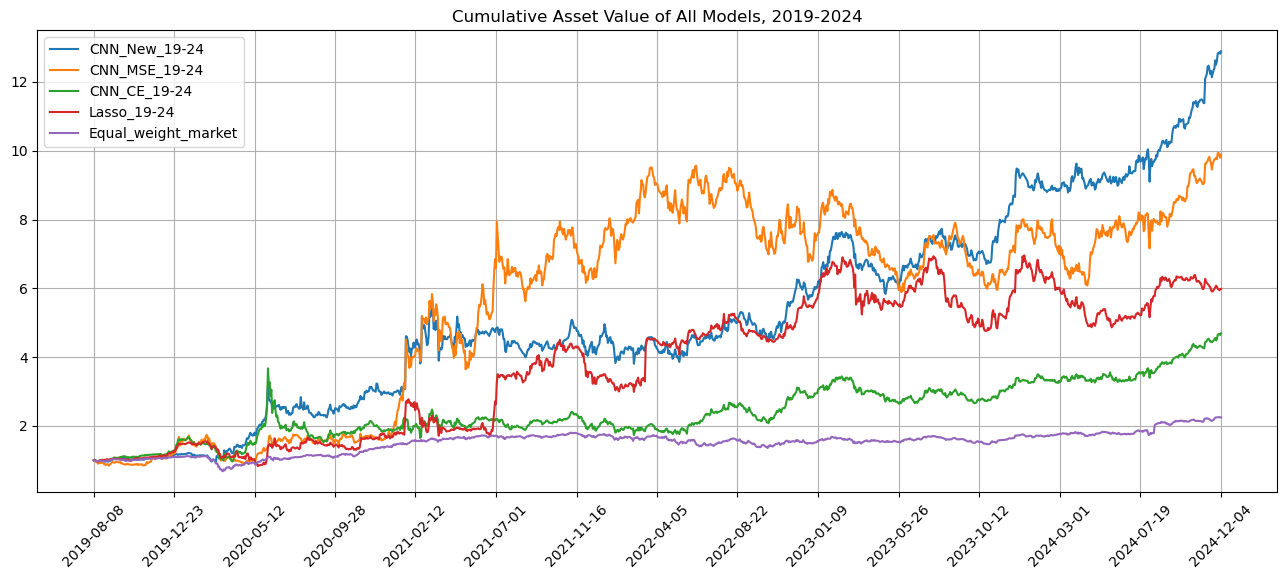

In [ ]:
plt.close()
plt.figure(figsize=(16, 6))
x_axis = all_days[401:402+20*67]
for key, value in final_asset_dict.items():
    plt.plot(x_axis, value, label=f'{key}')
indices_to_display = np.linspace(0, len(x_axis)-1, 15, dtype=int)
plt.xticks(indices_to_display, [x_axis[i] for i in indices_to_display], rotation=45)
plt.grid()
plt.legend()
plt.title('Cumulative Asset Value of All Models, 2019-2024')
plt.show()